# Clustering
* 构建vocab
* 构造每个文本段的tf-idf表示
* 使用聚类算法（sklearn）
> * K-means
> * Affinity propagation
> * Mean-shift
> * Spectral-clustering
> * Ward hierachical clustering
> * Agglomeractive clustering
> * DBSCAN
> * Gaussian Mixture

* 使用NMI(Normalized Mutual Information)评价指标

In [2]:
import numpy as np
import json
from sklearn.cluster import KMeans,MiniBatchKMeans,AffinityPropagation,MeanShift,SpectralClustering,AgglomerativeClustering,DBSCAN
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI ##评价指标
from sklearn.mixture import GaussianMixture

from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer ## vocab与tfidf统计的工具
from sklearn.manifold import TSNE ## 数据可视化工具
import pandas as pd
import matplotlib.pyplot as plt

import time

/home/blueberry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 数据预处理
* 读取json文本
* 构建文档tfidf表示

In [3]:
path = "Homework5Tweets.txt"
f = open(path,'r+')
lines = f.readlines()

In [4]:
documents = [json.loads(line) for line in lines]
texts = []
label = []
for d in documents:
    texts.append( d['text'].split(" "))
    label.append(d['cluster'])

#### 这里直接使用sklearn中内嵌的方法得到vocab与tfidf表示

In [5]:
vocab_builder = CountVectorizer()
td_idf_builder = TfidfTransformer()
tfidf = td_idf_builder.fit_transform(vocab_builder.fit_transform([d['text'] for d in documents])) ##直接得到每个document的tfidf向量
tfidf = tfidf.toarray()
print("document size:",tfidf.shape)
vocab=vocab_builder.get_feature_names()
print("vocab size:",len(vocab))
print("max_label",max(label))

document size: (2472, 5097)
vocab size: 5097
max_label 110


/home/blueberry/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


###  使用聚类算法（sklearn）
> * K-means
> * Affinity propagation
> * Mean-shift
> * Spectral-clustering
> * Ward hierachical clustering
> * Agglomeractive clustering
> * DBSCAN
> * Gaussian Mixture

In [6]:
##降维用于可视化
tsne=TSNE()
tsne.fit_transform(tfidf)  #进行数据降维,降成两维
tsne=pd.DataFrame(tsne.embedding_) #转换数据格式
tsne= np.array(tsne)

#### K-means

In [7]:
now = time.time()
kmeans_model=KMeans(n_clusters=max(label))
y1=kmeans_model.fit_predict(tfidf)
print('time',time.time()-now)

time 77.46439409255981


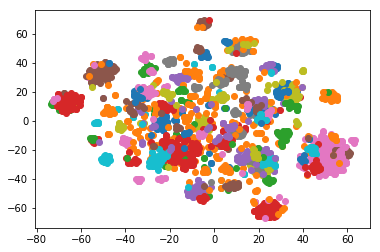

In [8]:
for i in range(max(y1)):
    index = np.where(y1==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [9]:
print("Kmeans: ",NMI(label,y1))

Kmeans:  0.7946666817044779


#### Affinity propagation

In [10]:
now = time.time()
affinitypropagation_model=AffinityPropagation()
y2=affinitypropagation_model.fit_predict(tfidf)
print('time',time.time()-now)

time 32.05430245399475


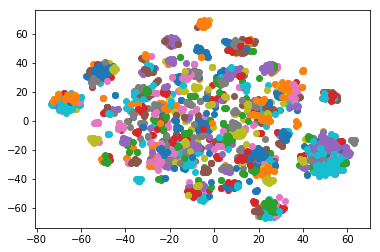

In [11]:
for i in range(max(y2)):
    index = np.where(y2==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [12]:
print("affinitypropagation: ",NMI(label,y2))

affinitypropagation:  0.785654609647782


#### Mean-shift

In [13]:
now = time.time()
meanshift_model = MeanShift(bandwidth=0.3,min_bin_freq=5)
y3=meanshift_model.fit_predict(tfidf)
print('time',time.time()-now)

time 22.535154104232788


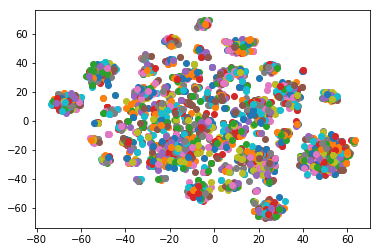

In [14]:
for i in range(max(y3)):
    index = np.where(y3==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [15]:
print("meanshift: ",NMI(label,y3))

meanshift:  0.6987909501721541


#### Spectral-clustering

In [16]:
now = time.time()
spectralclustering_model=SpectralClustering(n_clusters=max(label))
y4=spectralclustering_model.fit_predict(tfidf)
print('time',time.time()-now)

/home/blueberry/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


time 8.397493124008179


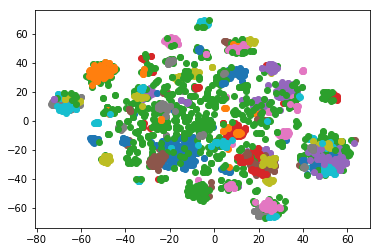

In [17]:
for i in range(max(y4)):
    index = np.where(y4==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [18]:
print("spectralclustering: ",NMI(label,y4))

spectralclustering:  0.6717047071832601


#### Ward hierachical clustering

In [19]:
now = time.time()
agglomerativeclustering_model = AgglomerativeClustering(n_clusters=max(label))
y5=agglomerativeclustering_model.fit_predict(tfidf)
print('time',time.time()-now)

time 16.149088382720947


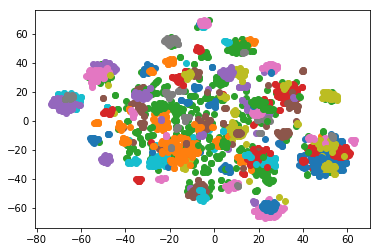

In [20]:
for i in range(max(y5)):
    index = np.where(y5==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [21]:
print("spectralclustering: ",NMI(label,y5))

spectralclustering:  0.77587403569932


#### Agglomeractive clustering

In [22]:
now = time.time()
agglomerativeclustering_model=AgglomerativeClustering(n_clusters=max(label),linkage ='average')
y6=agglomerativeclustering_model.fit_predict(tfidf)
print('time',time.time()-now)

time 15.979105234146118


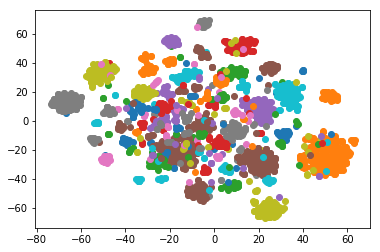

In [23]:
for i in range(max(y6)):
    index = np.where(y6==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [24]:
print("spectralclustering: ",NMI(label,y6))

spectralclustering:  0.9004539868135747


#### DBSCAN

In [25]:
now = time.time()
DBSCAN_model=DBSCAN(eps=0.6, min_samples=1)
y7=DBSCAN_model.fit_predict(tfidf)
print('time',time.time()-now)

time 11.401269674301147


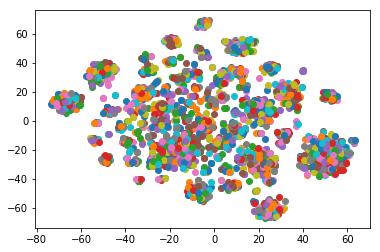

In [26]:
for i in range(max(y7)):
    index = np.where(y7==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [27]:
print("spectralclustering: ",NMI(label,y7))

spectralclustering:  0.7029125268375378


#### Gaussian Mixture

In [29]:
now = time.time()
GaussianMixture_model=GaussianMixture(n_components=10)
GaussianMixture_model=GaussianMixture_model.fit(tfidf)
y8 = GaussianMixture_model.predict(tfidf)
print('time',time.time()-now)

time 302.20699739456177


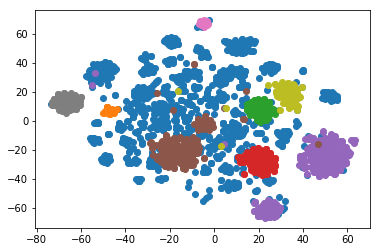

In [30]:
for i in range(max(y8)):
    index = np.where(y8==i)
    plt.plot(tsne[index][:,0],tsne[index][:,1],'o',label = i)

In [32]:
print("GaussianMixture_model: ",NMI(label,y7))

GaussianMixture_model:  0.7029125268375378
